In [12]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from lyapynov import ContinuousDS, DiscreteDS
from lyapynov import mLCE, LCE, CLV, ADJ

In [13]:
# Definition of a continuous dynamical system, here Newton-Leipnik.
alpha = 0.809
beta = 0.17
x0 = np.array([0.349, 0.0, 0.160])
t0 = 0.
dt = 1e-2

def f(x,t):
    res = np.zeros_like(x)
    res[0] = -alpha*x[0] + x[1] + 10*x[1]*x[2]
    res[1] = -x[0] - 0.4*x[1] + 5*x[0]*x[2]
    res[2] = beta*x[2] - 5*x[0]*x[1]
    return res

def jac(x,t):
    res = np.zeros((x.shape[0], x.shape[0]))
    res[0,0], res[0,1], res[0,2] = -alpha, 1+10*x[2], 10*x[1]
    res[1,0], res[1,1], res[1,2] = -1+ 5*x[2], -0.4, 5*x[0]
    res[2,0], res[2,1], res[2,2] = -5*x[1], -5*x[0], beta
    return res

NL = ContinuousDS(x0, t0, f, jac, dt)
NL.forward(10**6, False)

### a) Maximum 1-LCE (mLCE)

In [3]:
# Compute mLCE
mLCE, history = mLCE(NL, 0, 10**6, True)

In [4]:
# Print mLCE
print("mLCE: {:.3f}".format(mLCE))

mLCE: 0.161


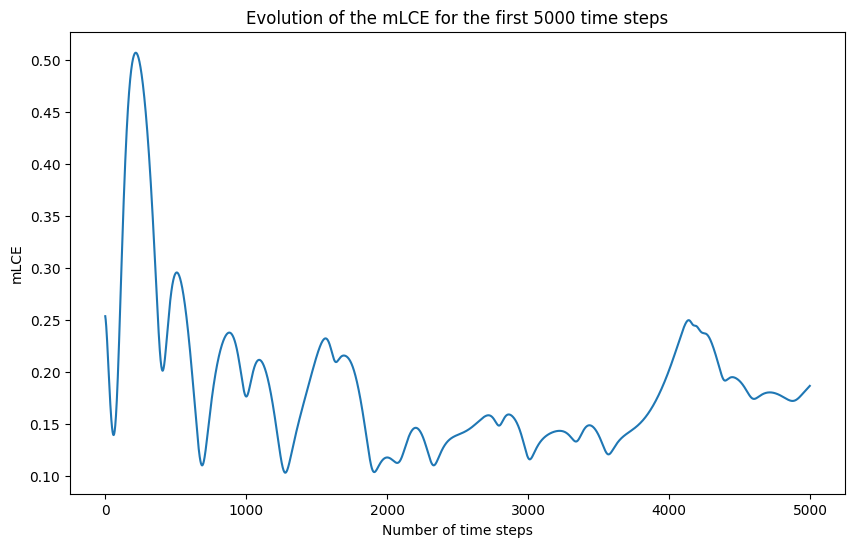

In [5]:
# Plot of mLCE evolution
plt.figure(figsize = (10,6))
plt.plot(history[:5000])
plt.xlabel("Number of time steps")
plt.ylabel("mLCE")
plt.title("Evolution of the mLCE for the first 5000 time steps")
plt.show()

### b) LCE

In [6]:
# Computation of LCE
LCE, history = LCE(NL, 3, 0, 10**6, True)


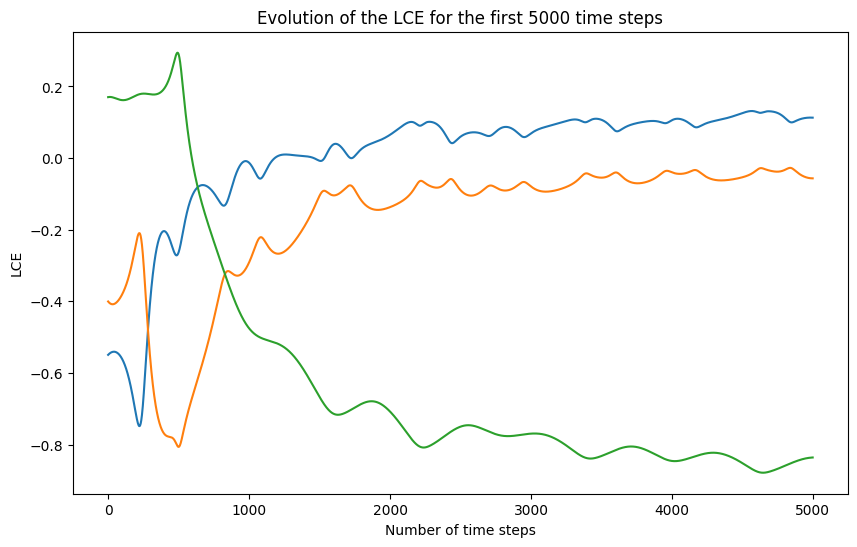

In [7]:
# Plot of LCE
plt.figure(figsize = (10,6))
plt.plot(history[:5000])
plt.xlabel("Number of time steps")
plt.ylabel("LCE")
plt.title("Evolution of the LCE for the first 5000 time steps")
plt.show()

### c) CLV

In [8]:
# Compute CLV
CLV, traj, checking_ds = CLV(NL, 3, 0, 10**5, 10**6, 10**5, True, check = True)

In [9]:
# Check CLV
LCE_check = np.zeros((NL.dim,))
for i in range(len(CLV)):
    W = CLV[i]
    init_norm = np.linalg.norm(W, axis = 0)
    W = checking_ds.next_LTM(W)
    norm = np.linalg.norm(W, axis = 0)
    checking_ds.forward(1, False)
    LCE_check += np.log(norm / init_norm) / checking_ds.dt
LCE_check = LCE_check / len(CLV)

print("Average of first local Lyapunov exponent: {:.3f}".format(LCE_check[0]))
print("Average of second local Lyapunov exponent: {:.3f}".format(LCE_check[1]))
print("Average of third local Lyapunov exponent: {:.3f}".format(LCE_check[2]))

Average of first local Lyapunov exponent: 0.162
Average of second local Lyapunov exponent: 0.000
Average of third local Lyapunov exponent: -0.942


### d) Adjoints of CLV

In [10]:
# Compute adjoints of CLV
ADJs = ADJ(CLV)

In [11]:
# Theta^{T}(t) * Gamma(t) = D(t)
np.transpose(ADJs[89547]) @ CLV[89547]

array([[ 4.53531672e-01,  1.20791256e-17, -2.66542386e-17],
       [ 7.54530045e-18,  9.42441258e-01,  3.28439311e-18],
       [ 2.95385492e-18,  2.27004382e-17,  4.48035022e-01]])